<a href="https://colab.research.google.com/github/pratikshaa12/Deep-learning/blob/main/1_Regression_PE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Regression

In [4]:
from warnings  import filterwarnings
filterwarnings("ignore")

#### Step 1 - Data Ingestion

In [5]:
import pandas  as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv"
df=pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


AT - atmospheric temp

V- vaccum pressure

AP- atmospheric pressure

RH- relative humidity

PE- powerplant output in MW(target)



### Step 2 - Perform basic data quality checks


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [7]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [8]:
df.duplicated().sum()

41

#### remove the duplicate values

In [9]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9522,15.12,48.92,1011.80,72.93,462.59
9523,33.41,77.95,1010.30,59.72,432.90
9524,15.99,43.34,1014.20,78.66,465.96
9525,17.65,59.87,1018.58,94.65,450.93


### Step 3 - Separate X and Y(PE)

In [10]:
x = df.drop(columns = ["PE"])
y = df[["PE"]]

In [11]:
x.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [12]:
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


### Step 4 - Apply preprocessing on x

In [13]:
x.dtypes

,0
AT,float64
V,float64
AP,float64
RH,float64


In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
). set_output(transform="pandas")


In [16]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


### Step 4 - Apply train test split

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.2, random_state=42)

In [18]:
xtrain.head()

,AT,V,AP,RH
5695,-0.152905,0.324507,0.089713,1.817999
7300,-1.497611,-1.153542,0.323712,0.908830
9066,-0.885038,-0.954892,0.293410,0.988245
6424,1.398679,1.223949,-0.479290,-1.082031
6773,-0.824586,-0.942279,0.796758,1.506499


In [19]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [20]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [21]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [22]:
xtrain.shape

(7621, 4)

In [23]:
ytrain.shape

(7621, 1)

In [24]:
xtrain.shape[1]

4

### step 5 - Training the neural network

In [25]:
from keras.models import  Sequential
from keras.layers import Input, Dense

In [26]:
# initialize the neural networks
model = Sequential()

# create an input layer
model.add(Input(shape=(xtrain.shape[1],)))

# create a  hidden layer 1
model.add(Dense(units = 8, activation="relu"))

# create a hidden layer 2
model.add(Dense(units=4, activation="relu"))

# create a output layer
model.add(Dense(units=1, activation="linear"))

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss="mse", optimizer="adam", metrics=["mae"])

In [29]:
hist = model.fit(xtrain,ytrain,validation_split=0.2, epochs=60)

Epoch 1/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 206731.4219 - mae: 454.3624 - val_loss: 204401.7969 - val_mae: 451.7632
Epoch 2/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 203761.8594 - mae: 451.0391 - val_loss: 196663.7812 - val_mae: 442.8909
Epoch 3/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 193812.9219 - mae: 439.4185 - val_loss: 172410.9844 - val_mae: 412.8267
Epoch 4/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 166425.3281 - mae: 404.2995 - val_loss: 133824.5312 - val_mae: 355.4002
Epoch 5/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 129122.1328 - mae: 345.5726 - val_loss: 98236.3359 - val_mae: 284.1797
Epoch 6/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 98126.9453 - mae: 283.8972 - val_loss: 74993.1562 - val_mae: 240.1478
Epoch 7/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 74521.7891 - mae: 241.8589 - val_loss: 56642.0469 - val_mae: 209.6762
Epoch 8/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54841.0859 - mae: 207

In [30]:
hist.history["loss"]

[206399.6875,
 202533.109375,
 188187.125,
 157325.046875,
 120075.453125,
 90649.1796875,
 69599.8359375,
 50272.828125,
 32264.09375,
 18864.05859375,
 11162.8359375,
 7250.25146484375,
 5123.66259765625,
 3826.29296875,
 2974.115234375,
 2385.851318359375,
 1976.3011474609375,
 1689.2255859375,
 1481.8782958984375,
 1322.9033203125,
 1192.1026611328125,
 1077.2760009765625,
 972.2141723632812,
 878.7321166992188,
 792.6104736328125,
 713.2669067382812,
 637.1573486328125,
 567.3270874023438,
 500.83428955078125,
 435.6523132324219,
 377.6192626953125,
 325.9450378417969,
 280.6839294433594,
 241.03851318359375,
 206.8692169189453,
 176.40255737304688,
 149.6825714111328,
 125.93964385986328,
 105.70643615722656,
 88.43910217285156,
 73.6407699584961,
 62.12392807006836,
 53.02027130126953,
 46.05109786987305,
 40.58509063720703,
 36.46885681152344,
 33.13644027709961,
 30.68215560913086,
 28.445669174194336,
 26.892709732055664,
 25.482370376586914,
 24.353641510009766,
 23.57372093

In [31]:
hist.history["val_loss"]

[204401.796875,
 196663.78125,
 172410.984375,
 133824.53125,
 98236.3359375,
 74993.15625,
 56642.046875,
 38500.86328125,
 23196.205078125,
 13542.3212890625,
 8701.5595703125,
 6170.91845703125,
 4628.1943359375,
 3595.85400390625,
 2867.331787109375,
 2343.2158203125,
 1969.0931396484375,
 1709.72119140625,
 1517.832275390625,
 1366.6571044921875,
 1235.1806640625,
 1116.364013671875,
 1015.77294921875,
 913.6675415039062,
 826.146240234375,
 739.8375244140625,
 664.0599365234375,
 587.0093994140625,
 514.5391235351562,
 446.3326721191406,
 387.71356201171875,
 333.89385986328125,
 289.7436828613281,
 246.11404418945312,
 210.371826171875,
 179.57093811035156,
 149.58563232421875,
 125.29405975341797,
 103.77973175048828,
 85.45024108886719,
 73.00178527832031,
 59.994056701660156,
 51.41102981567383,
 44.507606506347656,
 39.02301788330078,
 35.14826965332031,
 32.31214141845703,
 29.950326919555664,
 27.757152557373047,
 26.345909118652344,
 24.747806549072266,
 24.37993812561035

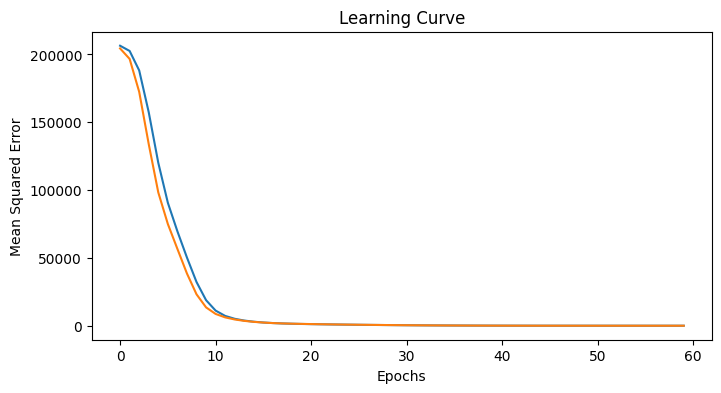

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.show()

# Model Evaluation

In [33]:
model.evaluate(xtrain, ytrain)

239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.7212 - mae: 3.4869


[20.166282653808594, 3.504716157913208]

In [38]:
model.evaluate(xtest,ytest)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.9962 - mae: 3.4015


[19.85724639892578, 3.470304012298584]

In [37]:
ypred_train = model.predict(xtrain)
ypred_test=model.predict(xtest)

239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [39]:
ypred_test[0:5]

array([[429.10022],
       [481.42538],
       [483.0407 ],
       [450.39105],
       [446.62335]], dtype=float32)

In [40]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [41]:
from sklearn.metrics import r2_score
r2_score(ytrain, ypred_train)

0.9298381209373474

In [42]:
r2_score(ytest, ypred_test)

0.934201717376709

#### Above has r2 score of 0.92> 0.8 hence it is a good model.

### Out of sample prediction

In [43]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv"
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [44]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [45]:
xnew_pre  = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [46]:
pred = model.predict(xnew_pre)
pred[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[443.52484],
       [437.4395 ],
       [429.4583 ],
       [439.65643],
       [473.33075]], dtype=float32)

In [47]:
xnew["PE_pred"] = pred

In [48]:
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,443.524841
1,28.88,54.89,1007.16,46.60,437.439514
2,27.89,73.21,1001.32,85.88,429.458313
3,25.69,62.26,1011.38,74.08,439.656433
4,12.16,40.81,1025.79,70.97,473.330750
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,437.170044
96,11.78,39.96,1011.37,82.95,472.758728
97,5.62,41.38,1020.91,86.21,483.954468
98,24.96,74.99,1008.25,80.52,437.449188


In [49]:
xnew.to_csv("Results.csv", index=False)

#### Saving the model object

In [50]:
model.save("powerplant.keras")

#### Load the model

In [51]:
from keras.models import load_model
nn = load_model("/content/powerplant.keras")
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)